In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [74]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [75]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,18,0,0
1,0,8,1
2,31,7,2
3,36,16,3
4,86,29,4


In [76]:
len(main_df)

39625

In [77]:
len(main_df)

39625

In [78]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 25.31972239747634
Average2: 11.291583596214512


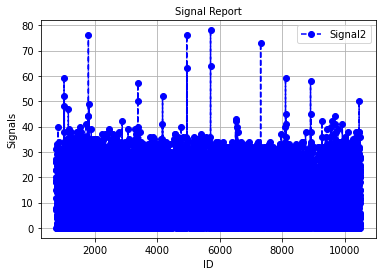

In [79]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [80]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [81]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [82]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,31,7
1,36,16
2,86,29
3,91,18
4,86,23


In [83]:
len(main_df)

25293

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [84]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [85]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [86]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [87]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[64.97850368078707, 64.98947363356866, 64.97522757189698, 64.91200441237108, 64.80121927712456, 64.71910364210574, 64.65174030722201, 64.59045388192645, 64.57682507396646, 64.55325531897851, 64.56636772797552, 64.55317863039069, 64.48567267384298, 64.38458089811365, 64.29232434977779, 64.16198559925965, 64.10566771872332, 64.06858948358268, 64.05597799449855, 64.05540609117196, 64.0643086559463, 64.04439982164601, 63.94593942008227, 63.89823282701832, 63.91998401466981, 63.90387273471812, 63.792919933667925, 63.761436559092736, 63.600937162283955, 63.63281113910768, 63.48012864411403, 63.44853687582692, 63.45365502974327, 63.34769682529355, 63.28816697620433, 63.32309105994541, 63.21215261026761, 63.16751264269749, 63.200607842671644, 63.11438617759233, 63.05788634027444, 63.02735536854196, 63.0

In [88]:
print(rms_values2) 
print(len(rms_values2))  

[8.060924492934236, 8.061604904333173, 8.06072128111976, 8.056798645390803, 8.049920451602274, 8.044818434377854, 8.040630591391574, 8.03681864184619, 8.035970698924086, 8.034504049347323, 8.035320014036499, 8.034499276892785, 8.03029717219998, 8.024000305216449, 8.01824945669426, 8.010117701960418, 8.00660150867541, 8.004285694775186, 8.003497859967137, 8.003462131551068, 8.004018281834838, 8.002774507734552, 7.9966204999413515, 7.993637021219961, 7.994997436814462, 7.993989788254556, 7.987047009606737, 7.985075864329201, 7.975019571279055, 7.977017684517672, 7.967441787933818, 7.9654589871411, 7.96578025241365, 7.959126637093642, 7.955386035649328, 7.9575807290875415, 7.950607059229352, 7.947799232661674, 7.949880995503746, 7.944456317306574, 7.940899592632716, 7.938976972415398, 7.937269773241614, 7.93721928275849, 7.931899515381051, 7.925741872971819, 7.9282344668370115, 7.922566075646513, 7.918297809799758, 7.920805405270748]
50


In [89]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [90]:
df.to_csv("s208_50.csv")